In [1]:

!conda install -c anaconda beautifulsoup4 --yes
import bs4 as bs
import urllib.request
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.0       |           py36_0         165 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    soupsieve-2.0              |             py_0          33 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

  beautifulsoup4     anaconda/linux-64::beautifulsoup4-4.9.0-py36_0
  soupsieve          anaconda/noarch::soupsieve-2.0-py_0

The following packages

In [2]:
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').read()
soup = bs.BeautifulSoup(source,'lxml')

#  find element table with class wikitable
table = soup.find('table', attrs={'class':'wikitable'})

# get the first table in the page
table = soup.find_all('table')

#dataframes have html parser for tables
df = pd.read_html(str(table))[0]



df.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [3]:
indexNames = df[df['Borough'] == 'Not assigned'].index
 
df.drop(indexNames , inplace=True)
df = df.reset_index(drop=True)

df.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [4]:
df[df['Neighborhood'] == ''].head()

,Postal code,Borough,Neighborhood


In [5]:
df['Neighborhood'].apply(lambda i: i if len(i)>0 else df['Borough'])

df.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [6]:
df['Neighborhood'] = df.groupby('Postal code')['Neighborhood'].transform(lambda x: ','.join(x))
df.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [7]:

print(df.shape)

(103, 3)


PART 2


In [11]:
df_postal = pd.read_csv('https://cocl.us/Geospatial_data')
df_postal.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
df3 = pd.merge(
    df,
    df_postal,
    left_on=['Postal code'],
    right_on=['Postal Code'],
    suffixes=('_left','_right')    
)

df3.head()

,Postal code,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,M5A,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,M6A,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,M7A,43.662301,-79.389494


PART-3

In [13]:
np.random.seed(0)

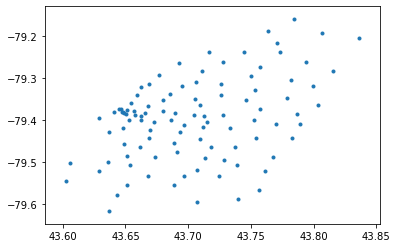

In [14]:

plt.scatter(df3['Latitude'], df3['Longitude'], marker='.')

In [15]:
from sklearn.preprocessing import StandardScaler
X = df3.values[:,4:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.93187104,  0.69818881],
       [ 0.40749844,  0.84388426],
       [-0.96437519,  0.37773518],
       [ 0.26644077, -0.6993678 ],
       [-0.81034434,  0.07922652],
       [-0.7039597 , -1.39737754],
       [ 1.95523876,  2.09777597],
       [ 0.79103364,  0.465121  ],
       [ 0.03427589,  0.90216906],
       [-0.90879146,  0.18842596],
       [ 0.09518258, -0.49568547],
       [-1.0279041 , -1.62993333],
       [ 1.53094905,  2.44798852],
       [ 0.40783172,  0.58164715],
       [-0.17744183,  0.81474393],
       [-1.01735586,  0.22482887],
       [-0.20737226, -0.32106485],
       [-1.1701819 , -1.86243118],
       [ 1.12942801,  2.15613628],
       [-0.54111407,  1.07704414],
       [-1.14613182,  0.24667041],
       [-0.29846415, -0.58298336],
       [ 1.271543  ,  1.86437197],
       [ 0.0852875 ,  0.3486083 ],
       [-0.89364811,  0.10106496],
       [-0.67165797, -0.26285143],
       [ 1.3126078 ,  1.6310228 ],
       [ 1.89922981,  0.3486083 ],
       [ 0.95236034,

In [16]:
from sklearn.cluster import KMeans 

clusterNum = 8
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)


[3 4 0 6 0 5 7 3 4 0 6 5 7 4 4 0 6 5 7 4 0 6 7 0 0 6 1 3 6 4 0 6 1 3 2 4 0
 0 4 3 6 0 0 0 4 3 2 4 0 2 2 4 3 2 0 6 6 2 4 3 2 3 6 6 2 1 3 3 6 6 2 1 3 6
 0 6 5 2 1 0 0 5 1 0 0 1 0 0 5 2 1 0 0 5 2 7 0 0 5 0 4 5 5]


In [17]:
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

df3["Labels"] = labels
df3.head(5)

[[ 43.6612497  -79.38352139]
 [ 43.77699581 -79.27717534]
 [ 43.72751776 -79.53223569]
 [ 43.7634434  -79.38256857]
 [ 43.70002713 -79.30410695]
 [ 43.63776628 -79.53356934]
 [ 43.69833924 -79.44383871]
 [ 43.79238216 -79.1932231 ]]


,Postal code,Borough,Neighborhood,Postal Code,Latitude,Longitude,Labels
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656,3
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572,4
2,M5A,Downtown Toronto,Regent Park / Harbourfront,M5A,43.654260,-79.360636,0
3,M6A,North York,Lawrence Manor / Lawrence Heights,M6A,43.718518,-79.464763,6
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,M7A,43.662301,-79.389494,0


In [18]:
# define the world map centered around Canada with a low zoom level
canada_map = folium.Map(location=[43.651070, -79.347300], zoom_start=11)

points = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng in zip(df3.Latitude, df3.Longitude):
    points.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6))

    
for lat, lng, label in zip(df3.Latitude, df3.Longitude, str(df3.Labels)):
    folium.Marker([lat, lng], popup=label).add_to((canada_map))

canada_map.add_child(points)
canada_map